Integrantes: 
- Michael Clemans
- Paula Marín
- Bárbara Pérez
- Sebastián Urbina

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = 'drive/MyDrive/Colab Notebooks (1)/Intro al Deep Learning/Tarea_1/'
df = pd.read_csv(path + 'inventario.csv')

In [ ]:
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [ ]:
df = df.drop(columns=['Order'])

In [ ]:
df.describe()

,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,1.989170e+05,75996.000000,75996.000000,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
mean,8.613626e+05,0.171009,0.322306,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,8.699794e+05,0.376519,1.168615,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,5.000100e+04,0.000000,0.000000,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.172520e+05,0.000000,0.000000,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,6.122080e+05,0.000000,0.000000,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,9.047510e+05,0.000000,0.000000,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000
max,3.960788e+06,1.000000,73.000000,99.000000,1.000000,1.738445e+07,12671.480000,2018.000000,2542.000000,14140.210000,19138.790000


¿Valores nulos?

In [ ]:
df_t = df.isnull().sum().sort_values(ascending=False)
df_p = (df.isnull().sum()*100/df.shape[0]).sort_values(ascending=False).round(2)
missing_data = pd.concat([df_t,df_p],axis=1,keys=['Total','Porcentaje[%]'])
missing_data.head(15)

,Total,Porcentaje[%]
SoldCount,122921,61.8
SoldFlag,122921,61.8
LowNetPrice,0,0.0
LowUserPrice,0,0.0
ItemCount,0,0.0
ReleaseYear,0,0.0
PriceReg,0,0.0
StrengthFactor,0,0.0
New_Release_Flag,0,0.0
ReleaseNumber,0,0.0


Los 15 productos más vendidos

In [ ]:
df.groupby(by=['SKU_number','SoldCount']).sum().sort_values(by='SoldCount',ascending=False).head(15)

,,SoldFlag,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
SKU_number,SoldCount,,,,,,,,,
665269,73.0,1.0,2,1,77114.0,35.50,2010,290,25.99,22.17
613864,69.0,1.0,0,0,7237.0,80.75,2012,44,0.00,0.00
141848,51.0,1.0,2,1,126988.0,13.89,2006,86,25.98,11.95
254518,40.0,1.0,10,1,472673.0,104.95,2011,92,274.51,66.54
767846,36.0,1.0,1,0,119854.0,92.85,2009,110,72.99,58.98
55769,36.0,1.0,1,0,157486.0,45.95,2000,178,48.98,44.99
416609,35.0,1.0,13,1,11377.0,346.25,2012,296,160.99,15.29
243550,34.0,1.0,1,0,1023998.0,27.93,2008,39,183.88,26.87
141824,33.0,1.0,7,1,283026.0,14.19,2007,223,43.93,13.71


In [ ]:
df_active = df[df['File_Type']=='Active']
print('Cantidad de productos activos: {}'.format(df_active.shape[0]))
df_active.head()

Cantidad de productos activos: 122921


,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
75996,Active,869734,NaN,NaN,S,9,1,1.251478e+06,92.82,2018,49,11.46,69.08
75997,Active,3741319,NaN,NaN,S,4,1,2.407071e+06,49.00,2016,0,0.00,49.00
75998,Active,3517789,NaN,NaN,S,3,1,6.890734e+06,44.95,2016,0,0.00,0.00
75999,Active,1455936,NaN,NaN,S,8,1,9.156233e+04,219.00,2014,44,13.71,59.81
76000,Active,2921480,NaN,NaN,S,5,1,6.922798e+06,83.95,2016,0,0.00,79.80


Los 15 productos activos con más inventario

In [ ]:
df_active[['SKU_number','ItemCount','ReleaseYear','New_Release_Flag','LowUserPrice','LowNetPrice','MarketingType']].sort_values(by='ItemCount', ascending=False).head(15)

,SKU_number,ItemCount,ReleaseYear,New_Release_Flag,LowUserPrice,LowNetPrice,MarketingType
125452,672549,2542,2002,0,3.00,4.83,S
98496,924198,1634,2004,0,3.92,0.00,S
117615,53985,1631,2001,1,4.00,5.09,S
195045,536345,1523,1994,0,4.00,6.66,S
197557,198645,1426,2008,1,4.00,7.24,S
114413,54246,1244,2003,1,3.99,4.78,S
118411,160073,1227,2000,0,2.27,0.00,S
123862,672653,1092,1991,0,4.00,6.48,S
193671,543471,1067,2009,0,4.00,0.00,S
109331,1598703,1010,2007,0,4.00,14.95,S


Convertimos `MarketingType` y `SoldFlag` a categorical de pandas para que sea más fácil graficar.

In [ ]:
df_hist['MarketingType'] = pd.Categorical(df_hist['MarketingType'])
df_hist['SoldFlag'] =  pd.Categorical(df_hist['SoldFlag'])

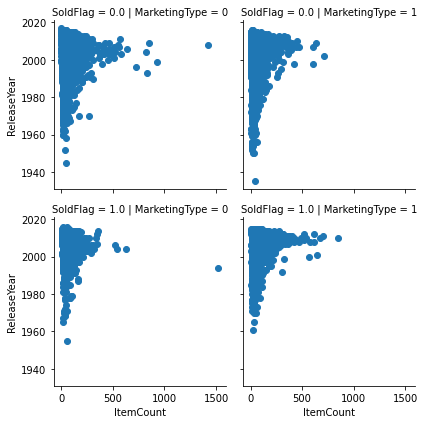

In [ ]:
g = sns.FacetGrid(data=df_hist, col='MarketingType', row='SoldFlag')
g.map(plt.scatter, 'ItemCount','ReleaseYear')

In [ ]:
df_hist_numeric = df_hist.loc[:, ~df_hist.columns.isin(['SKU_number','MarketingType','FileType'])]

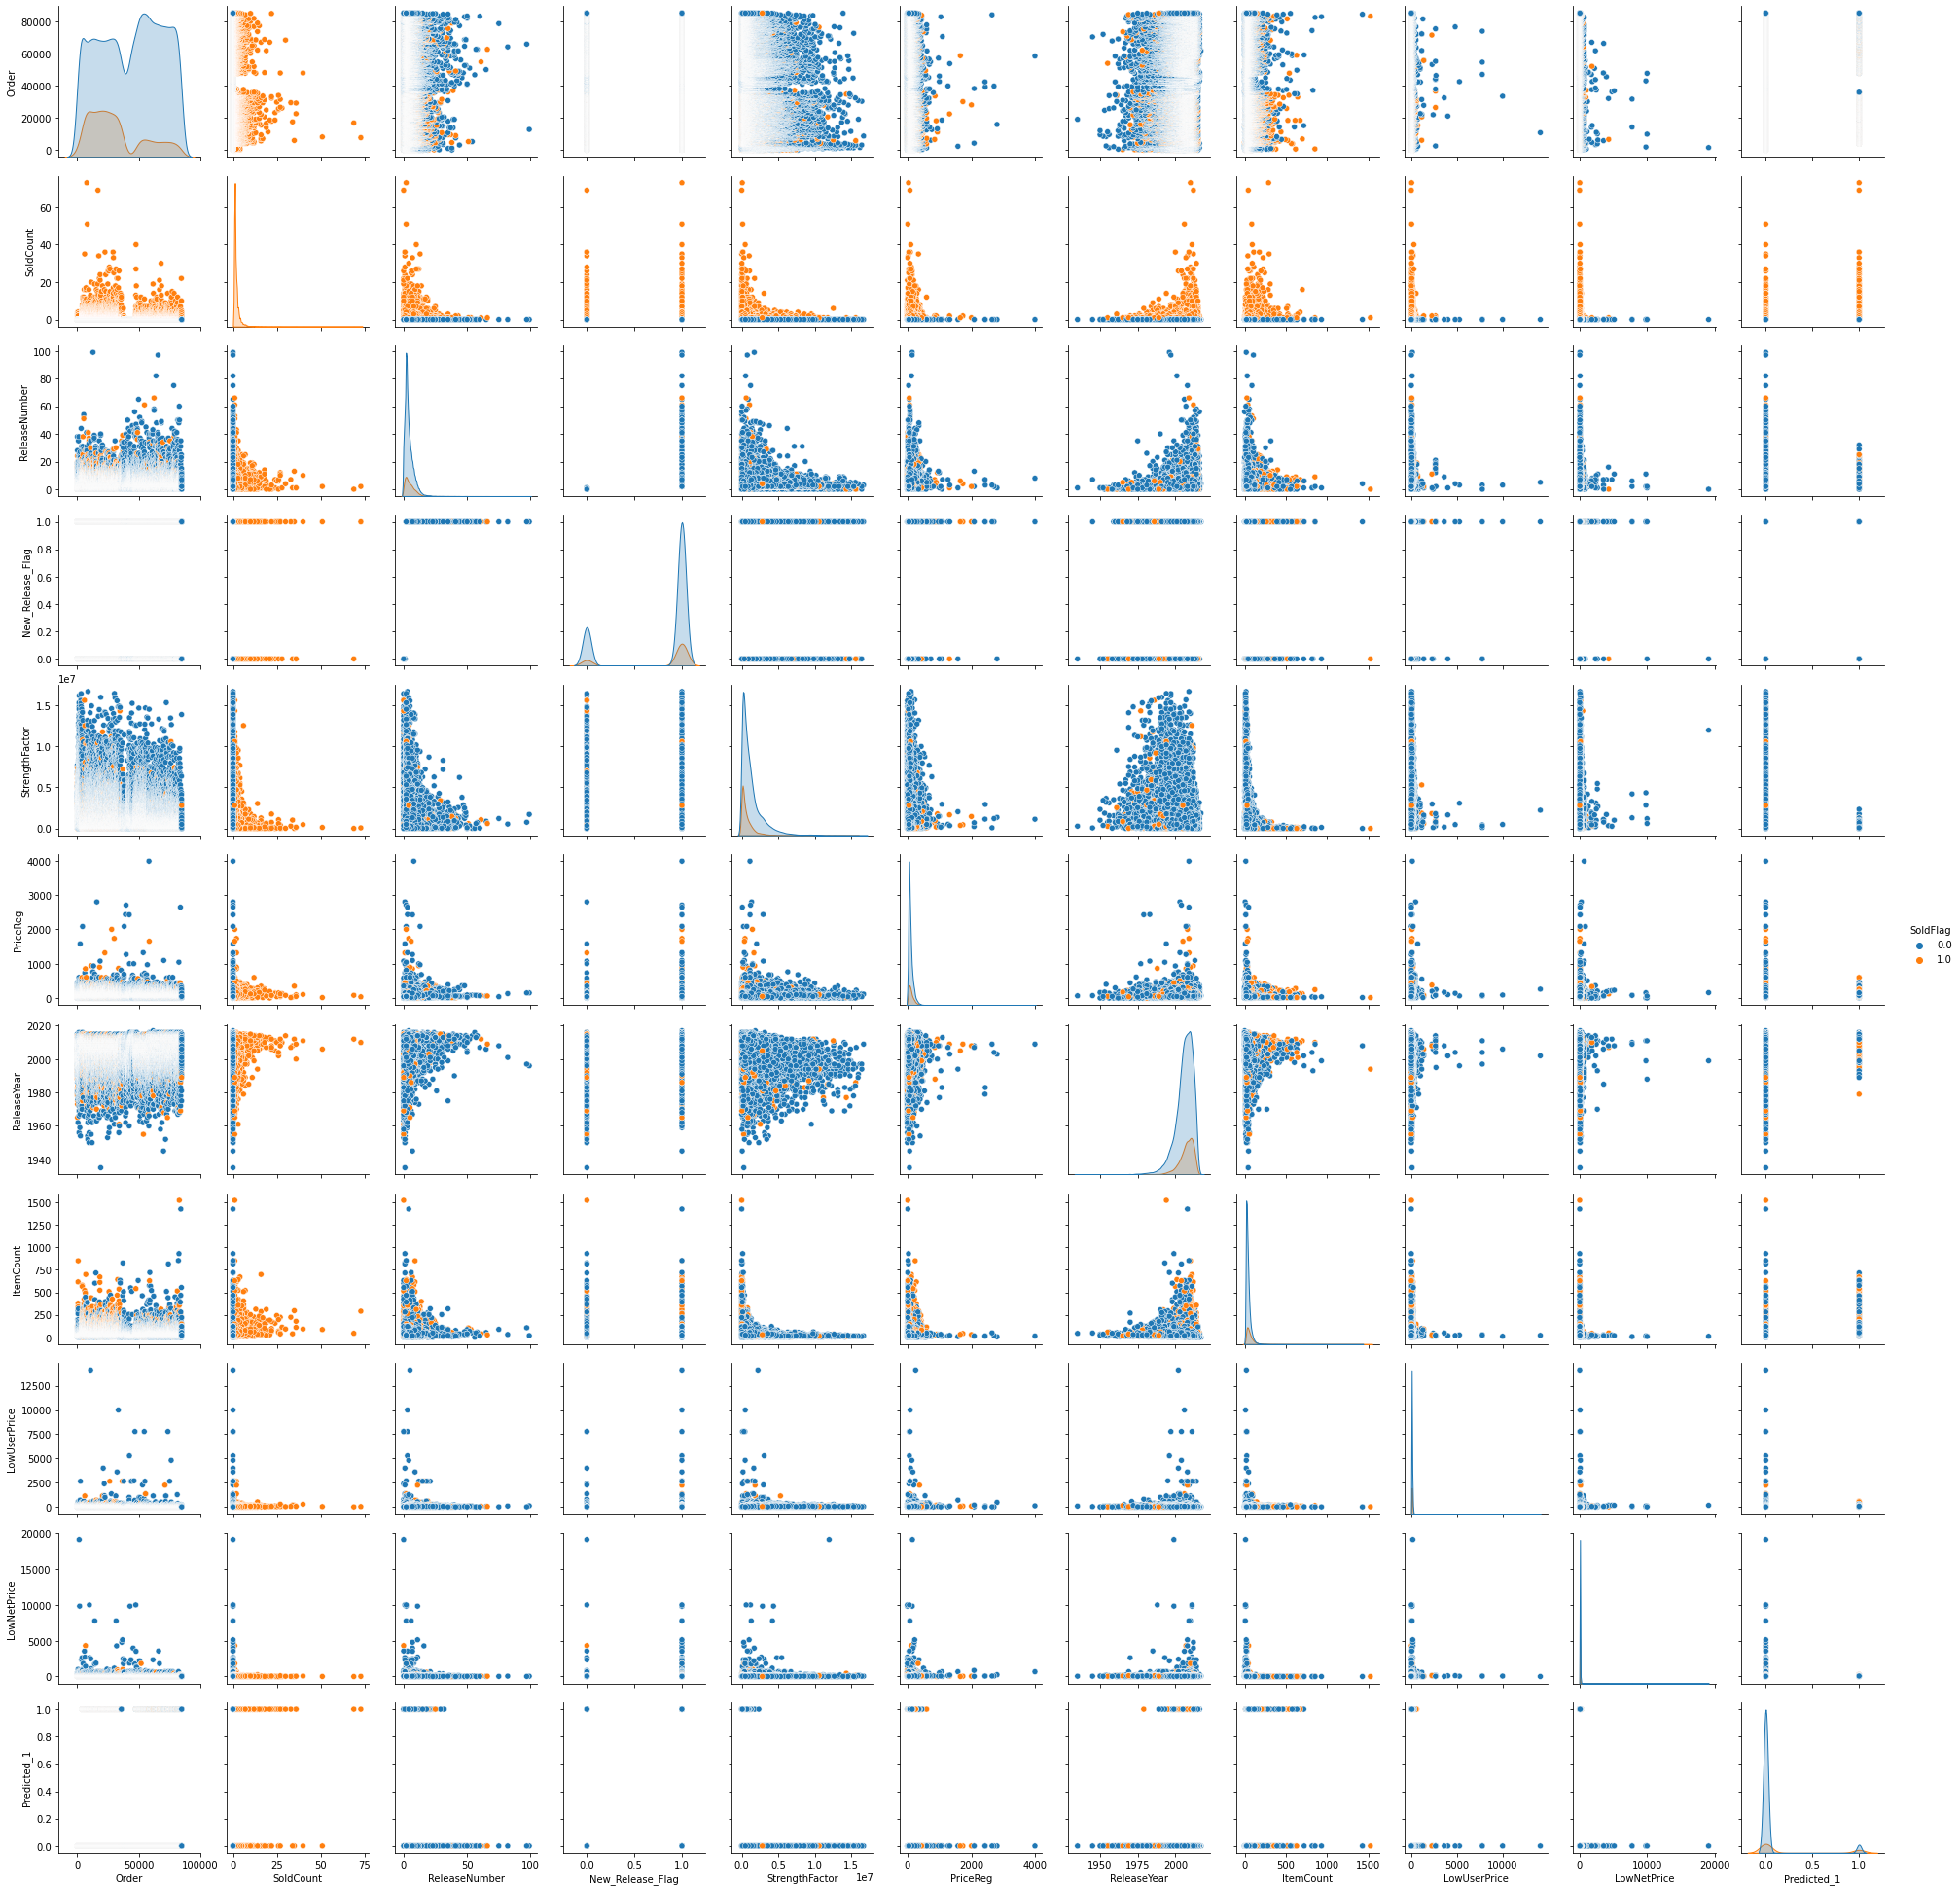

In [ ]:
g = sns.pairplot(df_hist_numeric, hue='SoldFlag')

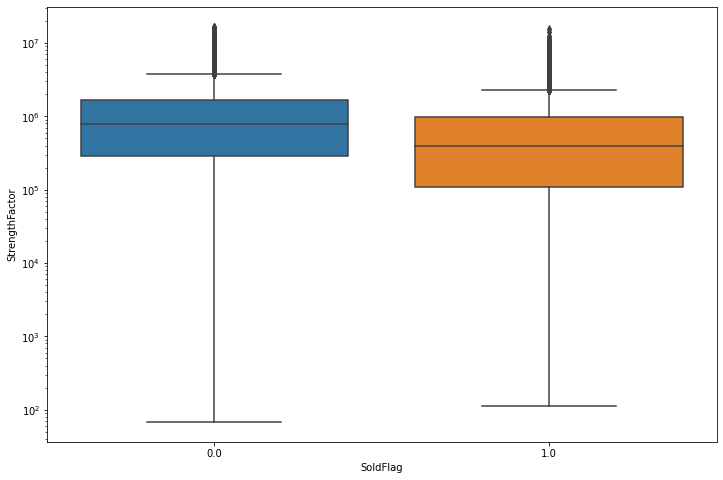

In [ ]:
fig, ax= plt.subplots(figsize=(12, 8))
sns.boxplot(data=df_hist, y ='StrengthFactor', x='SoldFlag')
ax.set_yscale('log')

Se ve más variabilidad en el atributo `StrengthFactor` en los productos que se vendieron en los últimos 6 meses.

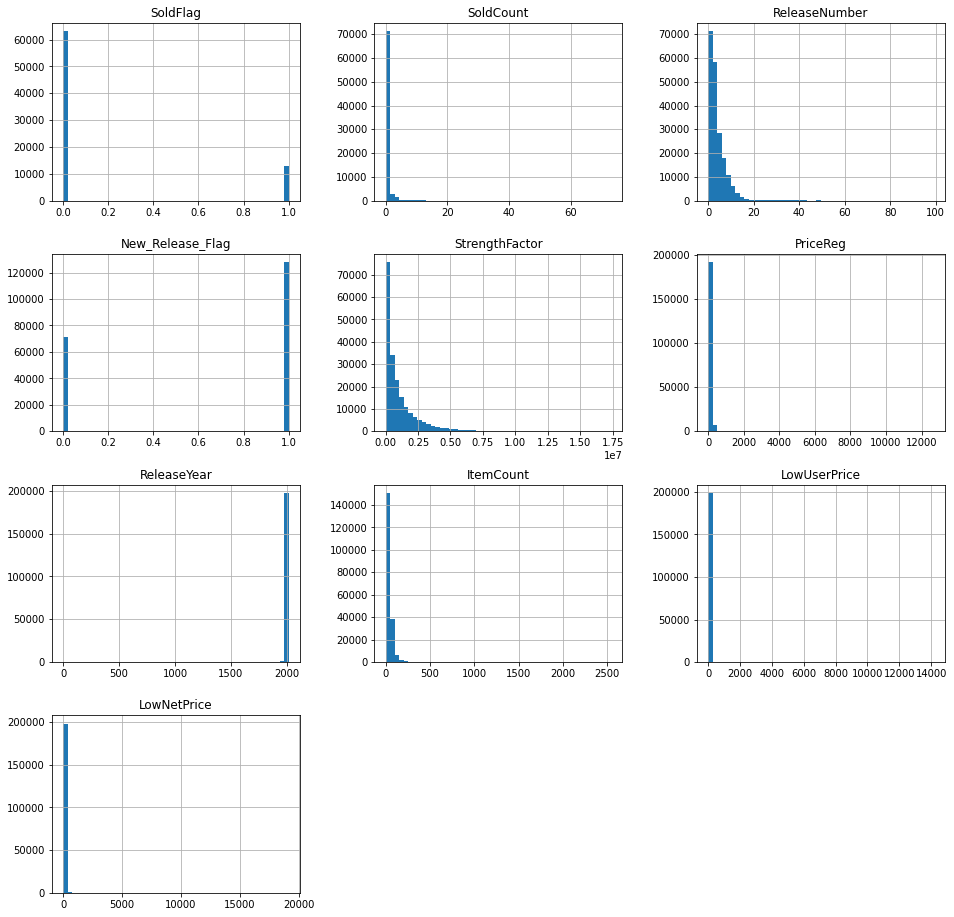

In [ ]:
df.loc[:,~df.columns.isin(['SKU_number'])].hist(figsize=(16,16),bins = 50,xlabelsize=10,ylabelsize =10)
plt.show()

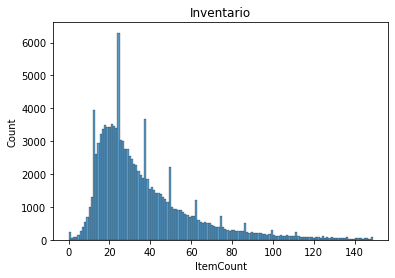

In [ ]:
sns.histplot(data=df_active[df_active['ItemCount']<150],x='ItemCount')
plt.title('Inventario');

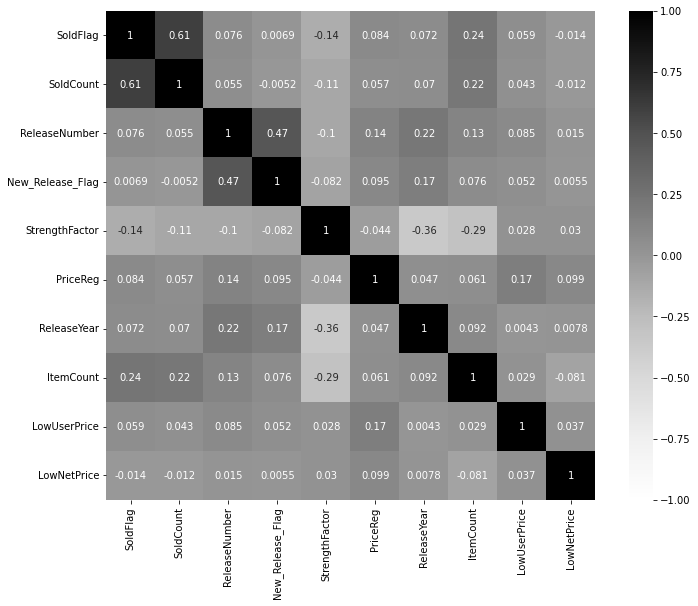

In [ ]:
corrmat = df_hist.loc[:, ~df_hist.columns.isin(['SKU_number'])].corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True, annot=True, cmap='Greys');

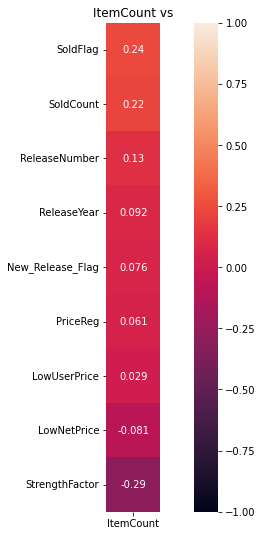

In [ ]:
corrmat_item_count = corrmat[['ItemCount']].sort_values(by='ItemCount', ascending=False).iloc[1:,:]
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat_item_count, vmax=1, vmin=-1, square=True, annot=True);
ax.set_title('ItemCount vs');

# Modelo P3

## Preprocesamiento

Convertimos la variable `MarketingType` a numérica.

In [ ]:
df['MarketingType'] = df['MarketingType'].apply(lambda x: 1 if x=='D' else 0).astype(int)

Dividimos el `dataframe` en datos históricos y datos activos. Utilizaremos los datos históricos para entrenar nuestro modelo.

In [ ]:
df_hist = df[df['File_Type']=='Historical']
df_active = df[df['File_Type']=='Active']

Definimos los datos de entrada `X_p3`, quitando aquellas columnas que no aportan información, por ser identificadores. Asimismo, `y_p3` corresponde a la variable objetivo o a predecir.

In [ ]:
X_p3 = df_hist.loc[:, ~df_hist.columns.isin(['File_Type','SKU_number','SoldFlag','SoldCount'])].to_numpy()
y_p3 = df_hist.loc[:,['SoldFlag']].to_numpy() # Var interés

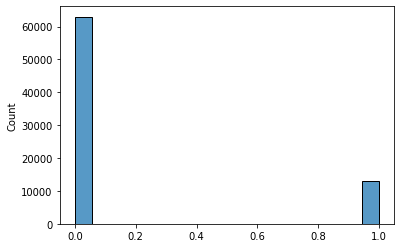

In [ ]:
sns.histplot(y_p3[:,0]);

Vemos que los datos están bastante desbalanceados, por lo que utilizaremos la técnica de `SMOTE` de la librería de `imblear` que nos permitirá oversamplear los datos y dejarlos balanceados.

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_p3, y_p3)

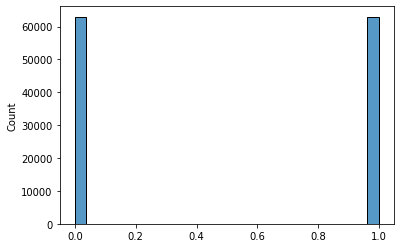

In [ ]:
sns.histplot(y_resampled)

Podemos ver, que ahora están balanceados los datos y así podemos asegurar que los resultados sean consistentes y no se vean sesgados por la clase mayoritaria.

Dividimos el conjunto de datos en 80% train y 10% test. Posteriormente se dividirá el conjunto train en 20% de validación.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.1, random_state = 24)

In [ ]:
print('X train:',X_train.shape,X_train.shape[0]/X_resampled.shape[0])
print('X test:',X_test.shape,X_test.shape[0]/X_resampled.shape[0])

X train: (113400, 9) 0.9
X test: (12600, 9) 0.1


### Normalización

Utilizaremos el método de `StandardScaler` de `sklearn` para normalizar los datos, con el objetivo de dejar los datos en una escala similar.

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

In [ ]:
normalized_train_X = scaler.transform(X_train)
normalized_test_X = scaler.transform(X_test)

Definimos el modelo de clasificación y una función que nos permitirá graficar el entrenamiento.

In [ ]:
def clasificador(n_var, drop_out):
  model = Sequential()
  model.add(Dense(32, input_dim=n_var, activation='relu'))
  model.add(Dropout(drop_out))
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(drop_out))
  model.add(Dense(1, activation='sigmoid'))
  return model

def graficos_entreno(metricas, h):
    f, ax = plt.subplots(2,2,figsize=(16,10))
    k = 0
    for i in range(2):
        for j in range(2):
            ax[i,j].plot(h.history[metricas[k]]);
            ax[i,j].plot(h.history['val_{}'.format(metricas[k])]);
            ax[i,j].set_ylabel(metricas[0])
            ax[i,j].legend(['train', 'val'], loc='upper left')
            ax[i,j].set_xlabel('epoch')
            k+=1
 
    plt.show()

Utilizaremos la librería de `optuna` para correr distintas pruebas, cambiando el parámetro de `dropout` y encontrar el que da mejor resultados.

In [ ]:
#!pip install optuna

In [ ]:
# from keras import backend as K
# import optuna

*Nota: Esta parte del código quedará comentada porque se demora bastante en correr*

In [ ]:
# n_epochs = 50
# n_batch  = 64
# def objective(trial):
#     K.clear_session()
#     drop_out = trial.suggest_float('drop_out',0.1,0.5, step=0.1)
#     modelo = clasificador(normalized_train_X.shape[1], drop_out)
#     callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)  #EarlyStopping
#     modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc','Precision','Recall'])
#     history = modelo.fit(normalized_train_X, y_train, epochs=n_epochs, batch_size=n_batch, validation_split=0.2, verbose=1, callbacks=[callback])
#     return history.history['val_acc'][-1]

In [ ]:
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

In [ ]:
#print('Mejores parámetros: {}'.format(study.best_params))

Luego de correr el estudio, se llegó al parámetro `dropout=0.1`

In [ ]:
n_var = normalized_train_X.shape[1]
modelo_p3 = clasificador(n_var, 0.1)
modelo_p3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc','Precision','Recall'])
modelo_p3.summary()
#modelo_p3.save_weights('model_base')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                320       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#modelo_p3.load_weights('modelo_p3_32_16_final')

In [ ]:
n_epochs = 100
n_batch  = 64
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6) #EarlyStopping
history_p3 = modelo_p3.fit(normalized_train_X, y_train, epochs=n_epochs, batch_size=n_batch, validation_split=0.2, verbose=1, callbacks=[callback])

Epoch 1/100
1418/1418 [==============================] - 4s 2ms/step - loss: 0.5942 - acc: 0.6850 - precision: 0.6961 - recall: 0.6567 - val_loss: 0.5561 - val_acc: 0.7239 - val_precision: 0.7231 - val_recall: 0.7227
Epoch 2/100
1418/1418 [==============================] - 3s 2ms/step - loss: 0.5581 - acc: 0.7180 - precision: 0.7236 - recall: 0.7054 - val_loss: 0.5263 - val_acc: 0.7435 - val_precision: 0.7539 - val_recall: 0.7204
Epoch 3/100
1418/1418 [==============================] - 3s 2ms/step - loss: 0.5390 - acc: 0.7278 - precision: 0.7348 - recall: 0.7128 - val_loss: 0.5100 - val_acc: 0.7515 - val_precision: 0.7697 - val_recall: 0.7153
Epoch 4/100
1418/1418 [==============================] - 3s 2ms/step - loss: 0.5287 - acc: 0.7325 - precision: 0.7403 - recall: 0.7162 - val_loss: 0.5011 - val_acc: 0.7543 - val_precision: 0.7569 - val_recall: 0.7468
Epoch 5/100
1418/1418 [==============================] - 3s 2ms/step - loss: 0.5217 - acc: 0.7370 - precision: 0.7441 - recall: 0.72

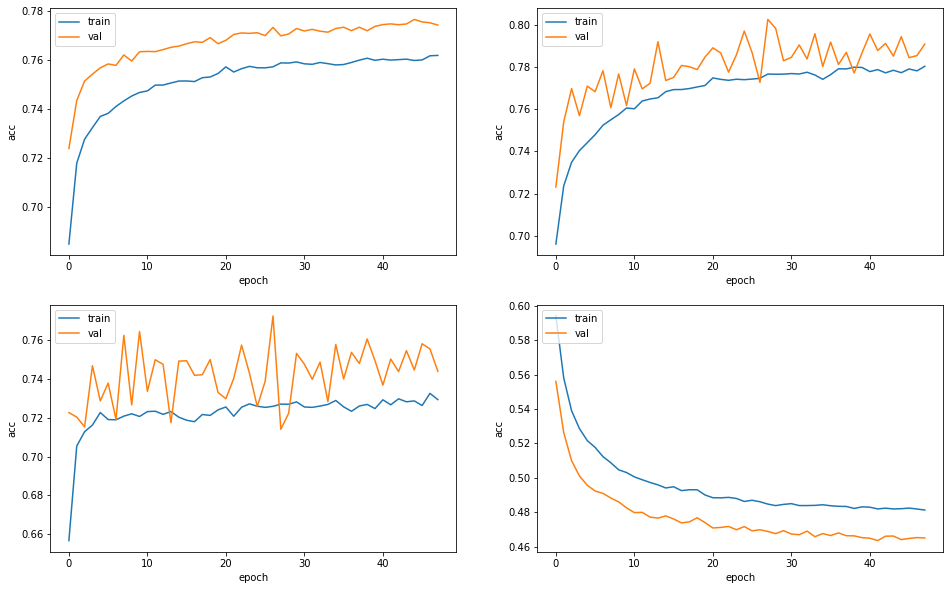

In [ ]:
graficos_entreno(['acc','precision','recall','loss'], history_p3)

## Guardamos los pesos del modelo

In [ ]:
#modelo_p3.save_weights('modelo_p3_32_16_final')

## Evaluamos el modelo en los datos de testing

In [ ]:
y_pred = modelo_p3.predict(normalized_test_X).round()

NameError: ignored

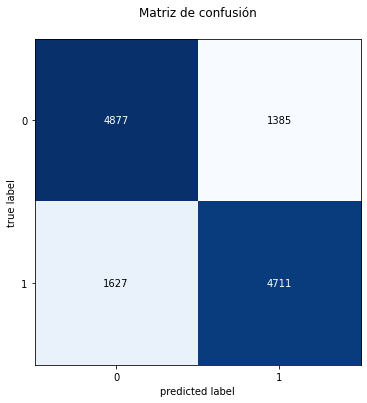

              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76      6262
         1.0       0.77      0.74      0.76      6338

    accuracy                           0.76     12600
   macro avg       0.76      0.76      0.76     12600
weighted avg       0.76      0.76      0.76     12600



In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred),figsize=(6,6), show_absolute=True, show_normed=False, colorbar=False)
plt.title('Matriz de confusión')
plt.show()
print(classification_report(y_test, y_pred))

# P5

Ahora debemos aplicar el modelo entrenado en la P3 para clasificar sobre los datos `Activos` y decidir qué productos dejar de vender.

Transformamos los datos activos a un arreglo

In [ ]:
X_active_to_predict = df_active.loc[:, ~df_active.columns.isin(['File_Type','SKU_number','SoldFlag','SoldCount'])].to_numpy()

Aplicamos la transformación con la que entrenamos el modelo a estos `nuevos datos` para que el modelo realice una predicción con sentido.

In [ ]:
normalized_active_to_predict = scaler.transform(X_active_to_predict)

Predecimos los datos que normalizamos

In [ ]:
predictions = modelo_p3.predict(normalized_active_to_predict).round()

Agregamos las predicciones a la columna `SoldFlag` de los datos `activos`

In [ ]:
df_active['SoldFlag'] = predictions

In [ ]:
df_active 

,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
75996,Active,869734,0.0,NaN,0,9,1,1.251478e+06,92.82,2018,49,11.46,69.08
75997,Active,3741319,0.0,NaN,0,4,1,2.407071e+06,49.00,2016,0,0.00,49.00
75998,Active,3517789,0.0,NaN,0,3,1,6.890734e+06,44.95,2016,0,0.00,0.00
75999,Active,1455936,1.0,NaN,0,8,1,9.156233e+04,219.00,2014,44,13.71,59.81
76000,Active,2921480,0.0,NaN,0,5,1,6.922798e+06,83.95,2016,0,0.00,79.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198912,Active,109683,0.0,NaN,0,7,1,2.101869e+05,72.87,2006,54,8.46,60.59
198913,Active,416462,0.0,NaN,0,8,1,4.555041e+05,247.00,2009,65,8.40,74.85
198914,Active,658242,0.0,NaN,0,2,1,1.692746e+05,50.00,2012,23,23.98,32.62
198915,Active,2538340,0.0,NaN,0,2,1,3.775266e+05,46.95,2001,23,27.42,37.89


In [ ]:
#df_active.to_csv('df_active_predicted.csv')

Por lo tanto, los productos a eliminar, serán aquellos que el modelo predice como que "no se van a vender".

In [ ]:
productos_a_eliminar = df_active[df_active['SoldFlag']==0]

In [ ]:
productos_a_eliminar['SKU_number']

75996      869734
75997     3741319
75998     3517789
76000     2921480
76001      862455
           ...   
198912     109683
198913     416462
198914     658242
198915    2538340
198916     416662
Name: SKU_number, Length: 114130, dtype: int64

In [ ]:
print('Cantidad de productos a eliminar: {} [{:.2f}%]'.format(productos_a_eliminar.shape[0], 100*productos_a_eliminar.shape[0]/df_active.shape[0]))
print('Cantidad de productos a conservar: {} [{:.2f}%]'.format(df_active.shape[0]-productos_a_eliminar.shape[0], 100-100*productos_a_eliminar.shape[0]/df_active.shape[0]))

Cantidad de productos a eliminar: 114130 [92.85%]
Cantidad de productos a conservar: 8791 [7.15%]


# P5

Filtramos los productos que según el modelo se van a vender.

In [ ]:
sku_predicted_1 = df_active[df_active['SoldFlag']==1]['SKU_number'].values

Buscamos los productos activos

In [ ]:
df_hist['Predicted_1'] = df_hist['SKU_number'].apply(lambda x: 1 if x in sku_predicted_1 else 0)

Creamos el ranking en función de las ventas históricas de los productos que se venderán según el modelo de clasificación.

*Nota: Los productos que no tiene data histórica no están considerados en este ranking*


In [ ]:
df_ranking = df_hist[df_hist['Predicted_1']==1][['SKU_number','SoldCount']] # De los que fueron predichos como que se venderán(1) tomamos el SKU y la cantidad ventas historicas
df_ranking = df_ranking.sort_values(by='SoldCount', ascending=False, ignore_index=True).reset_index().rename(columns={'index':'Ranking'})
df_ranking['Ranking'] = df_ranking['Ranking'].values+1
df_ranking.head(10)

,Ranking,SKU_number,SoldCount
0,1,613864,69.0
1,2,254518,40.0
2,3,767846,36.0
3,4,416609,35.0
4,5,747765,30.0
5,6,254192,28.0
6,7,540449,27.0
7,8,108270,24.0
8,9,860358,24.0
9,10,533423,22.0


Guardamos el archivo en formato `.csv`

In [ ]:
df_ranking.to_csv('ranking.csv')

A continuación definimos un `dataframe` con el `SKU_number` de los productos que no se tienen datos históricos y fueron predichos como que se venderán según el modelo.

In [ ]:
df_predicted_1 = pd.DataFrame(sku_predicted_1, columns=['SKU_number'])
df_predicted_1.head()

,SKU_number
0,1455936
1,875189
2,169720
3,54684
4,371478
